In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pickle

In [40]:
df = pd.read_csv('RC2.csv')

In [41]:
df.head()

,id,Age,Delivery1,Delivery2,Blood,Heart,Caesarian
0,1,22,1,0,2,0,0
1,2,26,2,0,1,0,1
2,3,26,2,1,1,0,0
3,4,28,1,0,2,0,0
4,5,22,2,0,1,0,1


In [42]:
df.shape

(80, 7)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         80 non-null     int64
 1   Age        80 non-null     int64
 2   Delivery1  80 non-null     int64
 3   Delivery2  80 non-null     int64
 4   Blood      80 non-null     int64
 5   Heart      80 non-null     int64
 6   Caesarian  80 non-null     int64
dtypes: int64(7)
memory usage: 4.5 KB


In [46]:
df['is_duplicated'] = df.duplicated()

In [47]:

df['is_duplicated'].value_counts()

False    80
Name: is_duplicated, dtype: int64

,Age,Delivery1,Caesarian
count,80.000000,80.000000,80.000000
mean,27.687500,1.662500,0.575000
std,5.017927,0.794662,0.497462
min,17.000000,1.000000,0.000000
25%,25.000000,1.000000,0.000000
50%,27.000000,1.000000,1.000000
75%,32.000000,2.000000,1.000000
max,40.000000,4.000000,1.000000


# Visualising health conditions and delivery history

In [52]:
#Visualising health conditions and delivery history
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,80.0,40.5000,23.237900,1.0,20.75,40.5,60.25,80.0
Age,80.0,27.6875,5.017927,17.0,25.00,27.0,32.00,40.0
Delivery1,80.0,1.6625,0.794662,1.0,1.00,1.0,2.00,4.0
Delivery2,80.0,0.6375,0.815107,0.0,0.00,0.0,1.00,2.0
Blood,80.0,1.0000,0.711568,0.0,0.75,1.0,1.25,2.0
Heart,80.0,0.3750,0.487177,0.0,0.00,0.0,1.00,1.0
Caesarian,80.0,0.5750,0.497462,0.0,0.00,1.0,1.00,1.0


In [54]:
#detail pengalaman C-Section atau tidak
df['Caesarian'].value_counts()/80

1    0.575
0    0.425
Name: Caesarian, dtype: float64

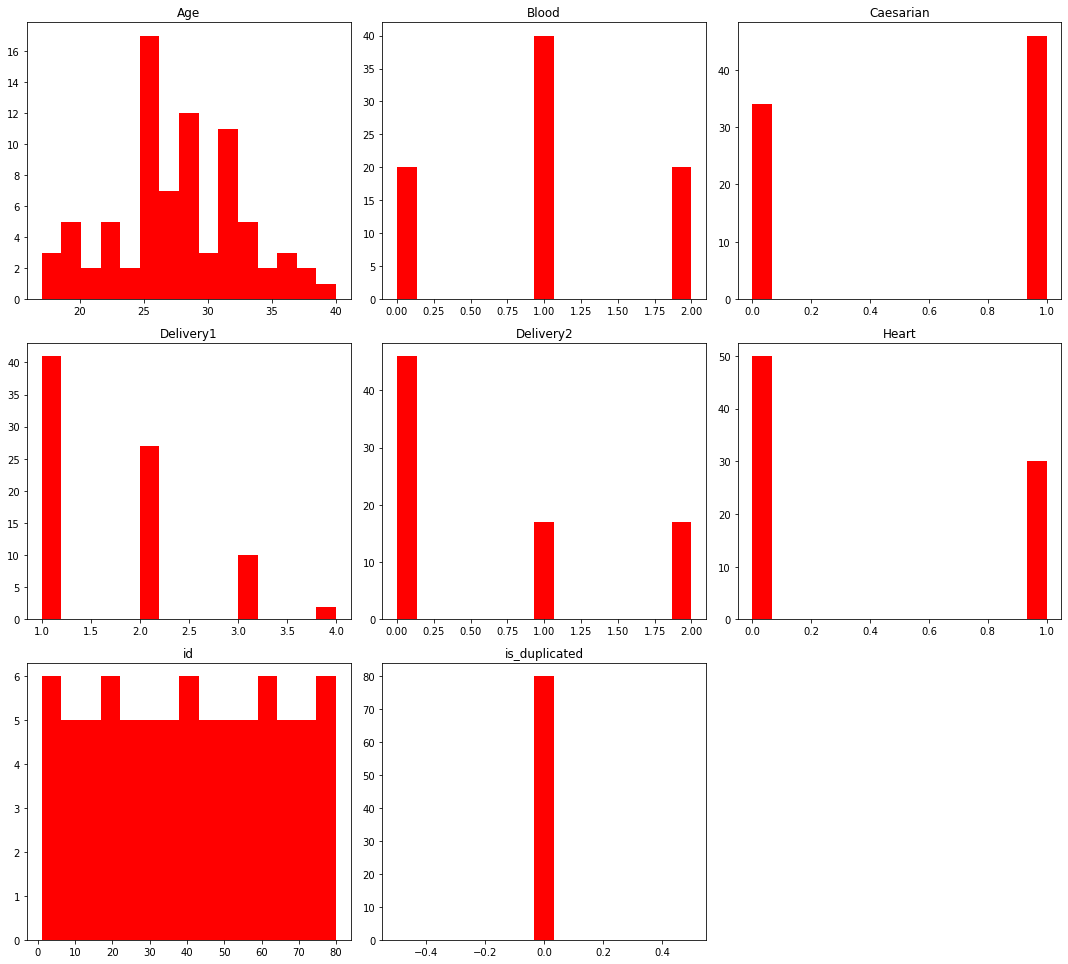

In [56]:
fig = df.hist(bins=15,
                 color='red',
                 #edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 #xrot=45, yrot=0,
                 figsize=(10,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))

#Kesimpulan
-Hampir 50% ibu hamil memiliki tekanan darah normal. Jumlah ibu hamil dengan tekanan darah rendah dan tinggi berada dalam urutan yang sama besarnya.
-50% ibu hamil memiliki tepat satu persalinan sebelumnya.
-Lebih dari 50% ibu hamil memiliki waktu persalinan yang tepat waktu. 
-Jumlah ibu hamis dengan waktu persalinan prematur dan terlambat datang dalam urutan yang sama besarnya.
-Mayoritas wanita tidak memiliki masalah jantung.
-Mayoritas wanita menjalani operasi caesar (57,5%). 

# Age and number of prior deliveries

untuk mengatahui hubungan antara usia dengan persalinan sebelumnya

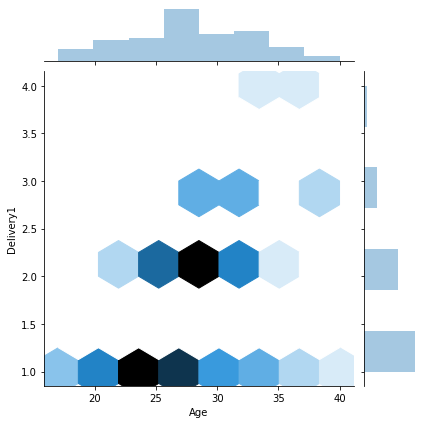

In [58]:
sns.jointplot(x='Age',y='Delivery1',data=df,kind='hex')

semakin muda wanita, semakin rendah jumlah persalinan sebelumnya. 

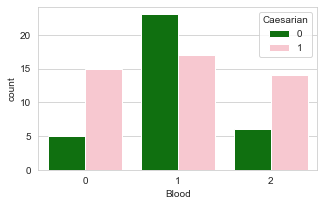

In [68]:
#Blood vs occurence of C-section

fig = plt.figure(figsize=(5, 3))

cp = sns.countplot(data=df, 
                   x="Blood", 
                   hue="Caesarian", 
                   palette={1: "Pink", 0: "Green"})

Terjadinya operasi caesar lebih besar ketika ibu hamil memiliki tekanan darah rendah (0) atau tekanan darah tinggi (2) dalam sampel ini. Kedua kondisi ini tampaknya berdampak pada kebutuhan untuk operasi caesar. Pada tekanan darah normal (1) terjadinya operasi caesar lebih sedikit, sehingga pada tekanan darah normal kemungkinan kecil untuk operasi caesar 

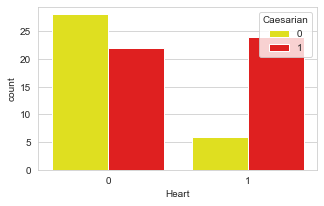

In [67]:
#Heart issue vs occurence of C-section
fig = plt.figure(figsize=(5, 3))

cp = sns.countplot(data=df, 
                   x="Heart", 
                   hue="Caesarian", 
                   palette={1: "Red", 0: "Yellow"})

Terjadinya operasi caesar jauh lebih besar ketika ibu hamil memiliki masalah jantung, yang tampaknya wajar. 